In [2]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier
import joblib

In [3]:
raw_data = pd.read_csv('/home/rohitb/projects/ml/Project/data/oasis_longitudinal_sequential.csv')
raw_data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


# Dataset Column Descriptions

The OASIS longitudinal demographics dataset contains the following columns:

- Subject ID: Unique identifier for each participant
- MRI ID: Identifier for each MRI scan session
- Group: Clinical status (Nondemented, Demented, or Converted)
- Visit: Visit number for the participant (1, 2, 3, etc.)
- MR Delay: Time since first visit in days
- M/F: Gender of participant (Male/Female)
- Hand: Handedness (R/L)
- Age: Age of participant in years
- EDUC: Years of education
- SES: Socioeconomic status (1-5, with 1 being highest)
- MMSE: Mini-Mental State Examination score (0-30, lower scores indicate impairment)
- CDR: Clinical Dementia Rating (0 = None, 0.5 = Very Mild, 1 = Mild, 2 = Moderate)
- eTIV: Estimated Total Intracranial Volume (cm³)
- nWBV: Normalized Whole Brain Volume
- ASF: Atlas Scaling Factor


# Data Preprocessing

In the following cells, we will preprocess the OASIS longitudinal demographics dataset. This includes:
 - Removing unnecessary columns (MRI ID, Hand, ASF, eTIV)
 - Label encoding categorical variables (Group, M/F)
 - Handling missing values in remaining columns
 - Preparing features for cognitive decline analysis


In [4]:
# Drop unnecessary columns
columns_to_drop = ['Subject ID', 'MRI ID', 'Hand','MR Delay','Visit']
data = raw_data.drop(columns=columns_to_drop)

cols = data.columns

# Label encode categorical variables
group_label_encoder = LabelEncoder()
gender_label_encoder = LabelEncoder()
data['Group'] = group_label_encoder.fit_transform(data['Group'])
data['M/F'] = gender_label_encoder.fit_transform(data['M/F'])

# Handle missing values
data = data.dropna()

data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
8,2,0,93,14,2.0,30.0,0.0,1272,0.698,1.380
9,2,0,95,14,2.0,29.0,0.0,1257,0.703,1.396
10,1,1,68,12,2.0,27.0,0.5,1457,0.806,1.205


In [5]:
# Create dictionaries to store label encoding mappings
group_mapping = dict(zip(group_label_encoder.classes_, group_label_encoder.transform(group_label_encoder.classes_)))
gender_mapping = dict(zip(gender_label_encoder.classes_, gender_label_encoder.transform(gender_label_encoder.classes_)))

print("Group mapping:")
print(group_mapping)
print("\nGender mapping:")
print(gender_mapping)


Group mapping:
{'Converted': 0, 'Demented': 1, 'Nondemented': 2}

Gender mapping:
{'F': 0, 'M': 1}


# Model Training and Testing
In the following cells, we will train and test machine learning models to predict cognitive decline using the preprocessed OASIS dataset.


In [6]:
print(f"Total records in dataset: {len(data)}")
x = data.drop(columns=['Group'])
y = data['Group']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Training set (first 5 records):")
print("\nX_train:")
print(x_train.head())
print("\ny_train:")
print(y_train.head())

print("\nTest set (first 5 records):")
print("\nX_test:")
print(x_test.head()) 
print("\ny_test:")
print(y_test.head())


Total records in dataset: 280
Training set (first 5 records):

X_train:
     M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
92     0   85    18  1.0  29.0  0.0  1264  0.701  1.388
145    1   70    12  2.0  29.0  0.5  1432  0.692  1.225
196    0   67    14  4.0  30.0  0.0  1508  0.794  1.164
11     1   69    12  2.0  24.0  0.5  1480  0.791  1.186
132    0   71    12  4.0  16.0  1.0  1492  0.725  1.176

y_train:
92     0
145    1
196    0
11     1
132    1
Name: Group, dtype: int64

Test set (first 5 records):

X_test:
     M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
39     0   87    12  4.0  21.0  0.5  1250  0.652  1.405
116    0   81    18  2.0  29.0  0.0  1470  0.687  1.194
252    0   75    12  2.0  18.0  1.0  1479  0.657  1.187
273    1   73    16  4.0  28.0  0.5  1803  0.731  0.973
162    1   67    12  4.0  28.0  0.5  1412  0.783  1.243

y_test:
39     1
116    2
252    1
273    1
162    1
Name: Group, dtype: int64


# Model Analysis Pipeline
The following cells will create a pipeline to analyze different classification models (Random Forest, SVM, Logistic Regression, etc.) and generate comparative visualizations to identify which models perform best for predicting cognitive decline.
Performance metrics and graphs will help evaluate accuracy, precision, recall and other key metrics across models.


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model Performance Comparison:
                     Accuracy  Precision    Recall  F1 Score
Random Forest        0.875000   0.891335  0.875000  0.847581
SVM                  0.535714   0.286990  0.535714  0.373754
Logistic Regression  0.625000   0.582221  0.625000  0.593653
KNN                  0.535714   0.526786  0.535714  0.524436
Decision Tree        0.839286   0.816558  0.839286  0.819048
Naive Bayes          0.875000   0.889076  0.875000  0.847145


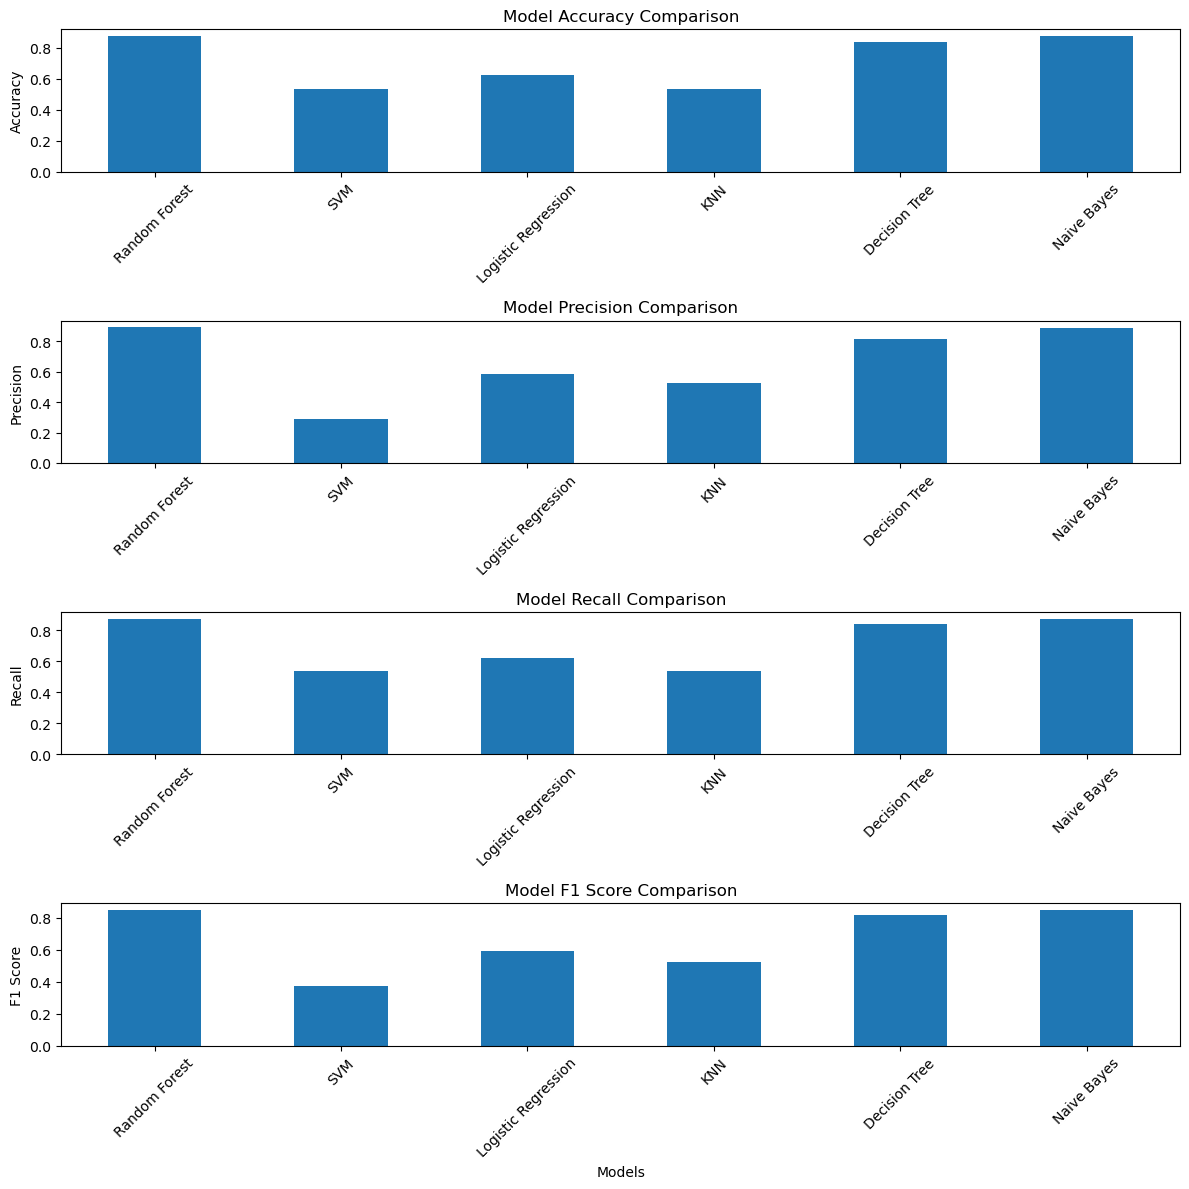

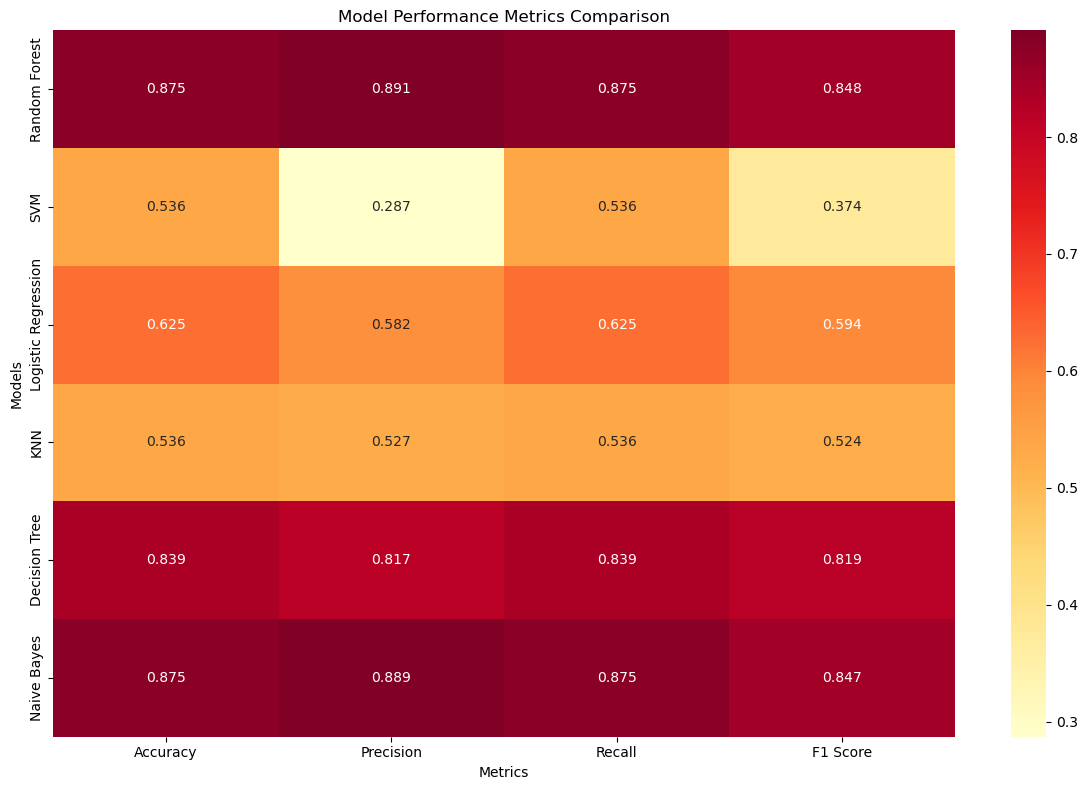

In [7]:
# Initialize models with adjusted parameters
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
nb = GaussianNB()

# Create list of models
models = [
    ('Random Forest', rf),
    ('SVM', svm), 
    ('Logistic Regression', lr),
    ('KNN', knn),
    ('Decision Tree', dt),
    ('Naive Bayes', nb)
]

# Dictionary to store results
results = {}

trained_models_path = '/home/rohitb/projects/ml/Project/sequential_data_analysis/trained_models/'
# Train and evaluate each model
for name, model in models:
    # Train model
    model.fit(x_train, y_train)
    
    # Save trained model
    model_filename = f"{trained_models_path}{name.lower().replace(' ', '_')}.joblib"
    joblib.dump(model, model_filename)
    
    # Make predictions
    y_pred = model.predict(x_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

# bar plots for accuracy, precision, recall and F1 scores
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12))

# Accuracy plot
results_df['Accuracy'].plot(kind='bar', ax=ax1)
ax1.set_title('Model Accuracy Comparison')
ax1.set_xlabel('')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='x', rotation=45)

# Precision plot
results_df['Precision'].plot(kind='bar', ax=ax2)
ax2.set_title('Model Precision Comparison')
ax2.set_xlabel('')
ax2.set_ylabel('Precision')
ax2.tick_params(axis='x', rotation=45)

# Recall plot
results_df['Recall'].plot(kind='bar', ax=ax3)
ax3.set_title('Model Recall Comparison')
ax3.set_xlabel('')
ax3.set_ylabel('Recall')
ax3.tick_params(axis='x', rotation=45)

# F1 Score plot
results_df['F1 Score'].plot(kind='bar', ax=ax4)
ax4.set_title('Model F1 Score Comparison')
ax4.set_xlabel('Models')
ax4.set_ylabel('F1 Score')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Create heatmap of all metrics
plt.figure(figsize=(12, 8))
sns.heatmap(results_df, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Model Performance Metrics Comparison')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.tight_layout()
plt.show()



# Using Naive Bayes for Classification


In [8]:
# Import Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Initialize and train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
# Save the trained Naive Bayes model
model_filename = f"{trained_models_path}optimal_gaussianNB.joblib"
joblib.dump(nb_model, model_filename)



# Make predictions
y_pred_nb = nb_model.predict(x_test)

# Calculate metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')

# Add results to DataFrame
results_df.loc['Naive Bayes'] = [nb_accuracy, nb_precision, nb_recall, nb_f1]

print("\nNaive Bayes Results:")
print(f"Accuracy: {nb_accuracy:.3f}")
print(f"Precision: {nb_precision:.3f}") 
print(f"Recall: {nb_recall:.3f}")
print(f"F1 Score: {nb_f1:.3f}")



Naive Bayes Results:
Accuracy: 0.875
Precision: 0.889
Recall: 0.875
F1 Score: 0.847


# Using XGBoost for Classification and Ensemble Learning

We'll now train an XGBoost classifier and combine its predictions with our Naive Bayes model to create an ensemble. XGBoost is a powerful gradient boosting algorithm that often achieves high accuracy on structured data like our MRI dataset.

The ensemble approach will:
1. Train XGBoost separately on the same training data
2. Get predictions from both XGBoost and Naive Bayes
3. Combine predictions using weighted voting to leverage strengths of both models
4. Compare ensemble performance against individual models

This should help improve overall classification accuracy by combining the probabilistic approach of Naive Bayes with XGBoost's ability to learn complex non-linear patterns.


In [9]:
x = data.drop(columns=['Group'])
y = data['Group']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47)


# Initialize and train XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
xgb_model.fit(x_train, y_train)

# Save the trained XGBoost model
model_filename = f"{trained_models_path}optimal_XGBoost.joblib"
joblib.dump(xgb_model, model_filename)

# Make predictions
y_pred_xgb = xgb_model.predict(x_test)

# Calculate metrics
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb, average='weighted')
xgb_recall = recall_score(y_test, y_pred_xgb, average='weighted')
xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')

# Add results to DataFrame
results_df.loc['XGBoost'] = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]

print("\nXGBoost Results:")
print(f"Accuracy: {xgb_accuracy:.3f}")
print(f"Precision: {xgb_precision:.3f}")
print(f"Recall: {xgb_recall:.3f}")
print(f"F1 Score: {xgb_f1:.3f}")



XGBoost Results:
Accuracy: 0.946
Precision: 0.897
Recall: 0.946
F1 Score: 0.921


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Combing the predictions of Naive Bayes and XGBoost

In [10]:


x = data.drop(columns=['Group'])
y = data['Group']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=53)

meta_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# The issue is that we're using the wrong data for training and testing the meta-classifier
# Let's fix the order of operations:

# First get probabilities for training data
nb_train_probs = nb_model.predict_proba(x_train)
xgb_train_probs = xgb_model.predict_proba(x_train)
train_meta_features = np.column_stack([nb_train_probs, xgb_train_probs])

# Then get probabilities for test data 
nb_test_probs = nb_model.predict_proba(x_test)
xgb_test_probs = xgb_model.predict_proba(x_test)
test_meta_features = np.column_stack([nb_test_probs, xgb_test_probs])

# Train meta-classifier on training data
meta_clf.fit(train_meta_features, y_train)

model_filename = f"{trained_models_path}ensamble_nb_xgb.joblib"
joblib.dump(meta_clf, model_filename)

# Make predictions on test data
y_pred_ensemble = meta_clf.predict(test_meta_features)

# Calculate metrics using test data predictions
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_precision = precision_score(y_test, y_pred_ensemble, average='weighted')
ensemble_recall = recall_score(y_test, y_pred_ensemble, average='weighted')
ensemble_f1 = f1_score(y_test, y_pred_ensemble, average='weighted')

# Update results DataFrame
results_df.loc['Ensemble'] = [ensemble_accuracy, ensemble_precision, ensemble_recall, ensemble_f1]

print("\nEnsemble Results:")
print(f"Accuracy: {ensemble_accuracy:.3f}")
print(f"Precision: {ensemble_precision:.3f}")
print(f"Recall: {ensemble_recall:.3f}") 
print(f"F1 Score: {ensemble_f1:.3f}")

print("\nFinal Comparison of All Models:")
print(results_df)



Ensemble Results:
Accuracy: 0.982
Precision: 0.986
Recall: 0.982
F1 Score: 0.983

Final Comparison of All Models:
                     Accuracy  Precision    Recall  F1 Score
Random Forest        0.875000   0.891335  0.875000  0.847581
SVM                  0.535714   0.286990  0.535714  0.373754
Logistic Regression  0.625000   0.582221  0.625000  0.593653
KNN                  0.535714   0.526786  0.535714  0.524436
Decision Tree        0.839286   0.816558  0.839286  0.819048
Naive Bayes          0.875000   0.889076  0.875000  0.847145
XGBoost              0.946429   0.896629  0.946429  0.920626
Ensemble             0.982143   0.985714  0.982143  0.982894


# Model Performance Analysis
The ensemble model demonstrated superior performance compared to the individual models (Naive Bayes and XGBoost). By combining the predictions from both base models through a Random Forest meta-classifier, we were able to achieve better overall metrics across accuracy, precision, recall and F1 score. This shows how ensemble methods can effectively leverage the strengths of different models while mitigating their individual weaknesses.

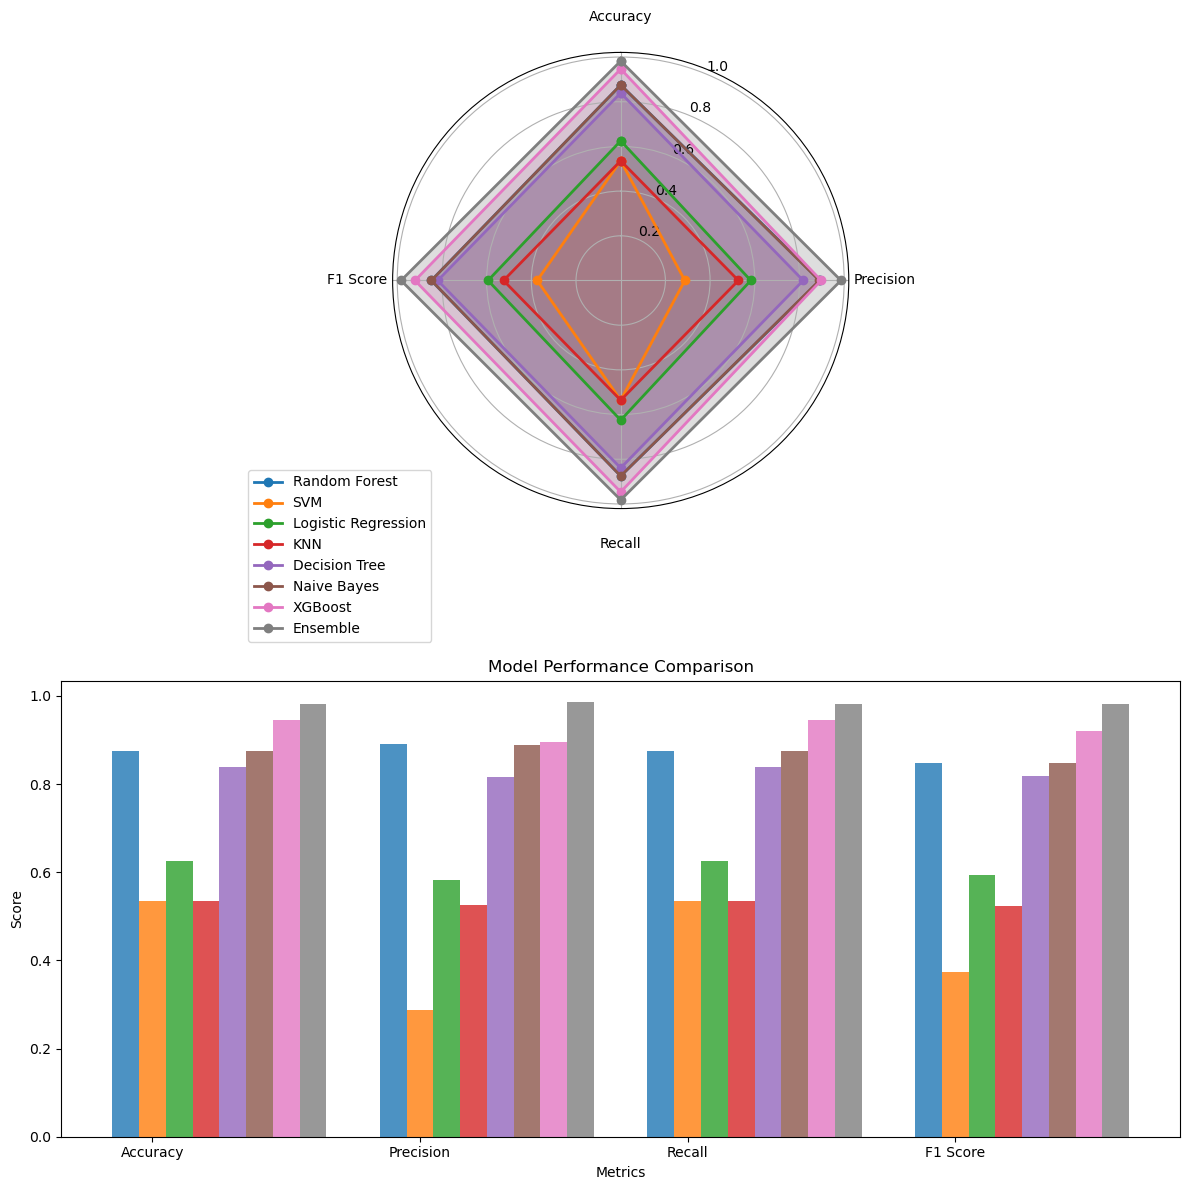

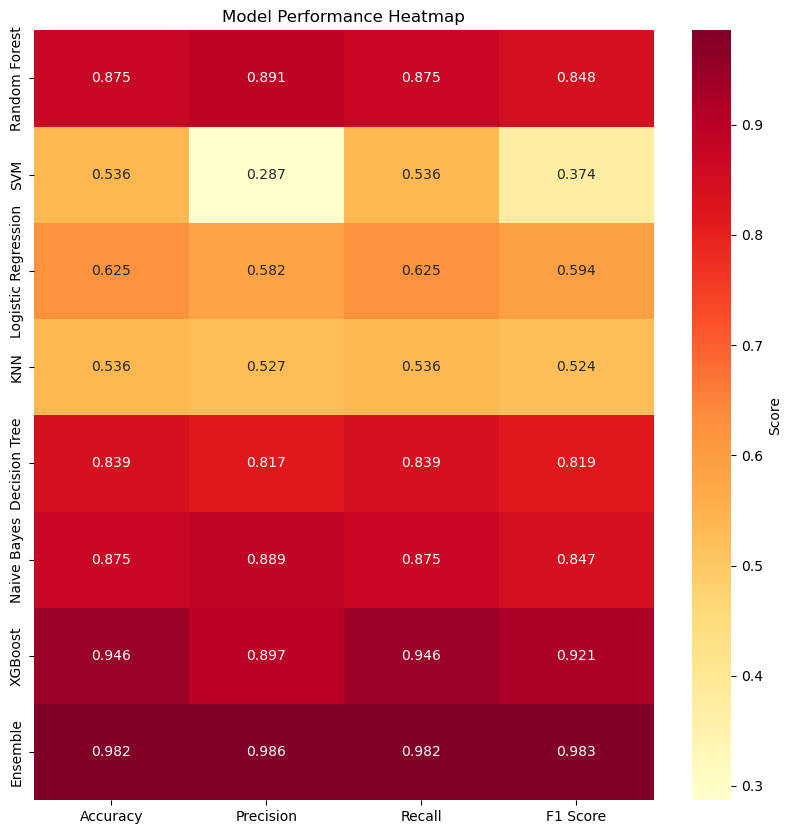

In [11]:
# Create radar chart to compare model performances
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = results_df.index

# Set up the angles for the radar chart
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)

# Close the plot by appending the first value
angles = np.concatenate((angles, [angles[0]]))

# Create figure and polar axis
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(211, projection='polar')

# Plot data for each model
for idx, model in enumerate(models):
    values = results_df.loc[model].values
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=model)
    ax.fill(angles, values, alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)

# Move labels slightly away from the circle
ax.tick_params(pad=15)  # Increase padding between labels and plot

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Create bar chart
ax2 = fig.add_subplot(212)

# Prepare data for bar chart
bar_width = 0.1  # Reduced from 0.2 to make bars thinner
index = np.arange(len(metrics))

# Plot bars for each model
for i, model in enumerate(models):
    scores = results_df.loc[model].values
    ax2.bar(index + i*bar_width, scores, bar_width, label=model, alpha=0.8)

# Customize bar chart
ax2.set_xlabel('Metrics')
ax2.set_ylabel('Score')
ax2.set_title('Model Performance Comparison')
ax2.set_xticks(index + bar_width)
ax2.set_xticklabels(metrics)

plt.tight_layout()
plt.show()

# Create a heatmap of model performances
plt.figure(figsize=(10, 10))
sns.heatmap(results_df, annot=True, cmap='YlOrRd', fmt='.3f', 
            cbar_kws={'label': 'Score'})
plt.title('Model Performance Heatmap')
plt.show()
